<a href="https://colab.research.google.com/github/18K41A0288/mini-project-digit-Recognizer/blob/master/MNISTdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [36]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [6]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_train[600]

In [8]:
x_train[34].shape

(28, 28)

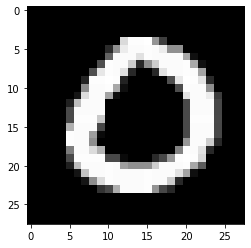

In [40]:
plt.imshow(x_train[429],cmap='gray')
plt.show()

In [41]:
x_train[34].min()

0

In [42]:
x_train[34].max()

255

In [43]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation ='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')

In [44]:
history = model.fit(x_train,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.5928 - accuracy: 0.9089
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3187 - accuracy: 0.9405
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2848 - accuracy: 0.9419
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2823 - accuracy: 0.9444
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2441 - accuracy: 0.9510


In [45]:
y_pred = model.predict_classes(x_test)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [46]:
y_pred[0]

7

In [47]:
np.argmax(y_pred[0])

0

In [48]:
np.argmax(model.predict(x_test), axis=-1)

array([7, 2, 1, ..., 4, 5, 6])

In [49]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.9502

In [50]:
confusion_matrix(y_pred,y_test)

array([[ 951,    0,    2,    3,    1,    4,    5,    3,    5,    1],
       [   0, 1123,    4,    3,    2,    2,    5,    7,    1,    4],
       [   4,    1,  982,   11,    3,    1,    1,   18,    5,    1],
       [   1,    2,    4,  949,    0,   22,    0,    2,    2,   18],
       [   0,    0,    0,    0,  934,    2,    0,    6,    5,   36],
       [   1,    1,    0,   15,    0,  814,    5,    1,    4,    5],
       [  10,    3,    4,    0,   15,   16,  934,    0,    3,    4],
       [   3,    0,   21,   15,    3,    3,    1,  972,    5,   13],
       [   9,    4,   15,   10,    9,   25,    7,    3,  941,   25],
       [   1,    1,    0,    4,   15,    3,    0,   16,    3,  902]])

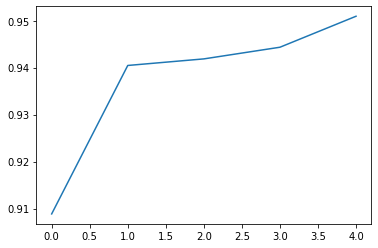

In [51]:
plt.plot(history.history['accuracy'])

In [52]:
model.get_weights()

[array([[-0.05434738, -0.00976722, -0.05510453, ..., -0.05750466,
         -0.00786541,  0.0489751 ],
        [ 0.02924469,  0.02845606,  0.0158584 , ...,  0.02125678,
          0.02397805, -0.00136   ],
        [ 0.02447025,  0.05759892, -0.06038276, ..., -0.04820761,
         -0.02809813,  0.04567616],
        ...,
        [-0.03939687,  0.01289061, -0.05538535, ..., -0.0499097 ,
          0.06464753, -0.05160552],
        [-0.04284858, -0.04201382, -0.0500163 , ...,  0.00687616,
         -0.02401638, -0.05979956],
        [-0.02450695,  0.04811991,  0.00210926, ..., -0.06127512,
          0.03965271, -0.04024168]], dtype=float32),
 array([-0.03921641, -0.03392365, -0.03078187, -0.02971831, -0.0229016 ,
        -0.01333355, -0.03651479, -0.02886007, -0.03854549, -0.02960559,
        -0.02400943, -0.07773003, -0.04452162, -0.03554706, -0.00819388,
        -0.0489267 , -0.03717421, -0.07120476, -0.01884459, -0.05544123,
        -0.05293234, -0.02205535, -0.02318401, -0.04815435, -0.041

In [53]:
model.save('model.h5')

In [54]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
new = tf.keras.models.load_model('model.h5')

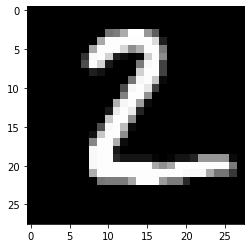

In [59]:
image = x_test[1]
plt.imshow(image,cmap='gray')

In [56]:
image_resize = cv2.resize(image,(28,28)).reshape(1,28,28)

In [57]:
new.predict_classes(image_resize)

array([2])